<a href="https://colab.research.google.com/github/Arkelyscorpion/DataScienceUsingPython_22_46_55/blob/master/developing_prediction_model_for_hotel_reservations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents:

 - [Intro](#intro) <br>
 - [Import Libraries](#import) <br>
 - [Reading Data](#read) <br>
 - [Exploratory Data Analyis](#eda) <br>
 - [Data Preprocessing](#preprocess) <br>
 - [Building ML Models](#model)

# Introduction<a id="intro"></a>

Aim of this notebook is to help the company in predicting which customer will cancel the booking.<br>
We have booking details for a city hotel and a resort hotel, such as when the booking was made, length of stay, arrival date, number of guests, available parking spaces and other parameters.<br>
First,we will focus on Exploratory Data Analysis and then move on to the prediction approach.

# Import Libraries <a id="import"></a>

In [ ]:
# Linear Algebra
import numpy as np

# Data Processing
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


# Reading Data <a id="read"></a>

In [ ]:
df = pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')

# Understanding Data and Cleaning <a id="clean"></a>

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.shape

(119390, 32)

In [ ]:
df = df.drop_duplicates()
df.shape

(87396, 32)

Data had many duplicate values which now has been cleaned.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

Datatype of children and agent is in float. We will change datatypes of children to integer and agent to string after removing null values, if any.

In [ ]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


company feature has many null values. So this column can be dropped.

In [ ]:
df=df.drop(columns='company')

For agent feature, we assume that null value means booking is done by guest themselves. So first we will look through unique values in agent feature then assign null values with a different value.

In [ ]:
df.agent.unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

We see that no agent has value 0. Still lets check.

In [ ]:
df[df['agent']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


Now we replace null values with 0 in agent feature.

In [ ]:
df['agent'].fillna(value=0,inplace=True)

In [ ]:
df = df.dropna(axis=0) # To remove rows with null value

In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Now there are no null values. <br>
Now, to look for unique values in each feature we will loop through features

In [ ]:
for i in df.columns:
    print(i ,'has', df[i].unique(),'\n')

hotel has ['Resort Hotel' 'City Hotel'] 

is_canceled has [0 1] 

lead_time has [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99  95  96  69  45  40  15  36  43  70  16 107  47 113  90
  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364 324
  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8 100
  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112  65
  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108 106
  31  87  41 304 117  59  53  58 116  42 321  38 118  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133

Now we convert datatype of children from <font color= blue>__float__</font> to <font color= blue>__int__</font>.

In [ ]:
df.children= df.children.astype(int)
df.children.unique()

array([ 0,  1,  2, 10,  3])

Convert datatype of agent from <font color= blue>__float__</font> to <font color= blue>__int__</font>

In [ ]:
df.agent=df.agent.astype(int) #to remove decimal

Adults has value 0. But by law, hotel can't be booked for childrens and babies. So we will drop that rows.

In [ ]:
df = df[df['adults']!=0]

In [ ]:
d = {'January':1, 'February':2, 'March':3, 'April':4,'May':5,'June':6,'July':7,
    'August':8,'September':9,'October':10,'November':11,'December':12}
df.arrival_date_month = df.arrival_date_month.map(d)

We make two DataFrames, one in which bookings are cancelled and other where it's not cancelled

In [ ]:
df_not_c =df[df['is_canceled']==0] #dataframe for bookings not cancelled
df_c = df[df['is_canceled']==1] #dataframe for bookings cancelled
df_not_c=df_not_c.drop('is_canceled',axis=1)
df_c=df_c.drop('is_canceled',axis=1,)

# Exploratory data analysis <a id="eda"></a>

#### 1. Hotel

Text(0.5, 1.0, 'Hotel v No. of Guest')

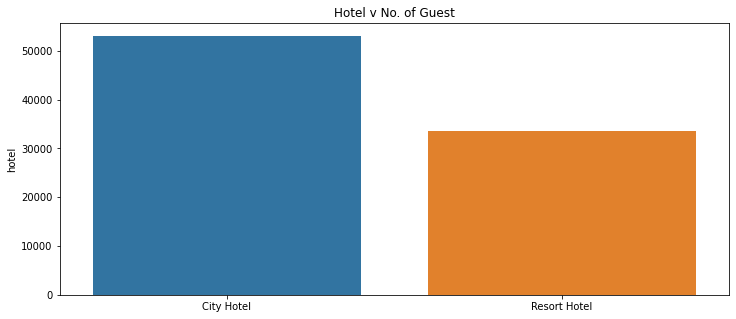

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=df.hotel.value_counts().index,y=df.hotel.value_counts())
plt.title('Hotel v No. of Guest')

#### 2. Meal

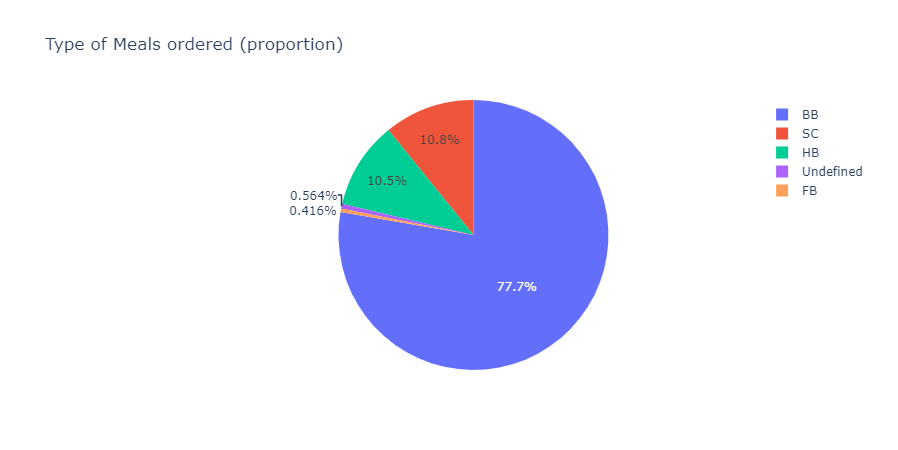

In [ ]:
px.pie(data_frame=df.meal.value_counts(),names=df.meal.value_counts().index,values=df.meal.value_counts(),title='Type of Meals ordered (proportion)')

#### 3. Market Segment

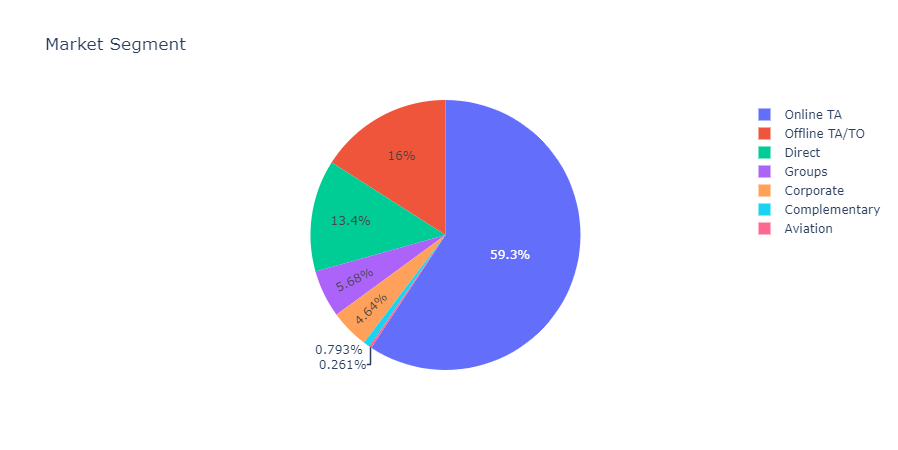

In [ ]:
px.pie(data_frame=df.market_segment.value_counts(),names=df.market_segment.value_counts().index,values=df.market_segment.value_counts(),title='Market Segment')

#### 4. Distribution Channel

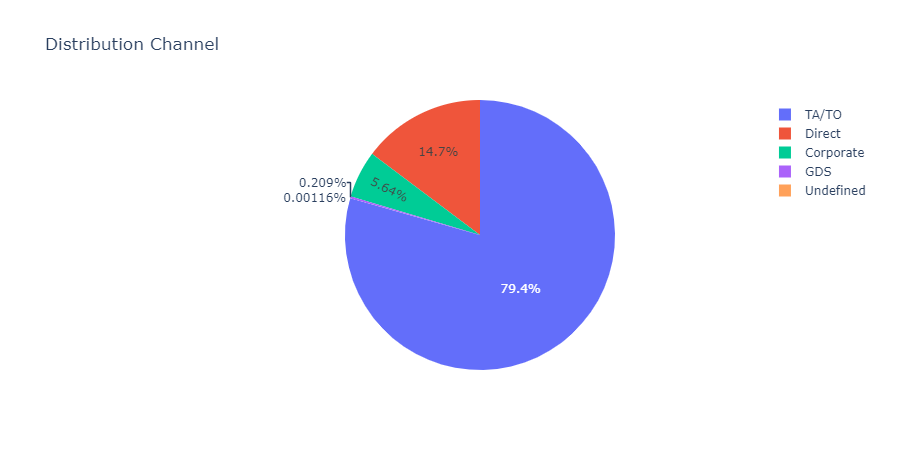

In [ ]:
px.pie(data_frame=df.distribution_channel.value_counts(),names=df.distribution_channel.value_counts().index,values=df.distribution_channel.value_counts(),title='Distribution Channel')

#### 5. Repeated Guest

In [ ]:
print('Percentage of repeated guests =',len(df_not_c[df_not_c['is_repeated_guest']==1])*100/len(df_not_c),'%')

Percentage of repeated guests = 4.945344291071571 %


#### 6. Room types

Text(0.5, 1.0, 'Reserved Room Type')

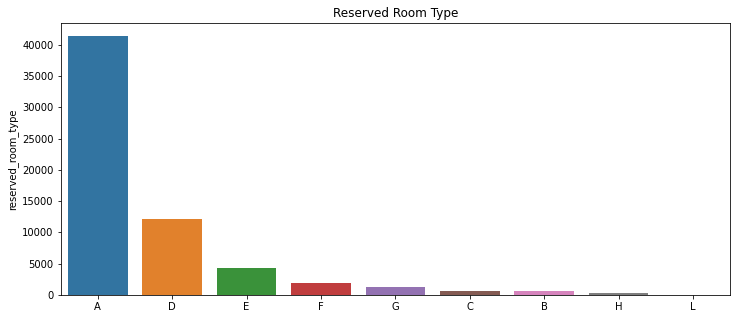

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=df_not_c.reserved_room_type.value_counts().index,y=df_not_c.reserved_room_type.value_counts())
plt.title('Reserved Room Type')

Text(0.5, 1.0, 'Assigned Room Type')

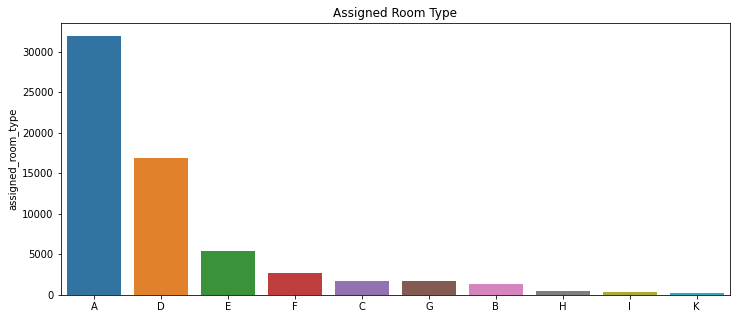

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=df_not_c.assigned_room_type.value_counts().index,y=df_not_c.assigned_room_type.value_counts())
plt.title('Assigned Room Type')

In [ ]:
print('Proportion of bookings where assigned room type is not what was reserved room type=', len(df_not_c[df_not_c['reserved_room_type']!=df_not_c['assigned_room_type']])*100/len(df_not_c),'%')

Proportion of bookings where assigned room type is not what was reserved room type= 19.364876725444827 %


#### 7. Deposit Type

In [ ]:
df_not_c.deposit_type.value_counts()

No Deposit    62529
Refundable       81
Non Refund       55
Name: deposit_type, dtype: int64

#### 8. Customer Type

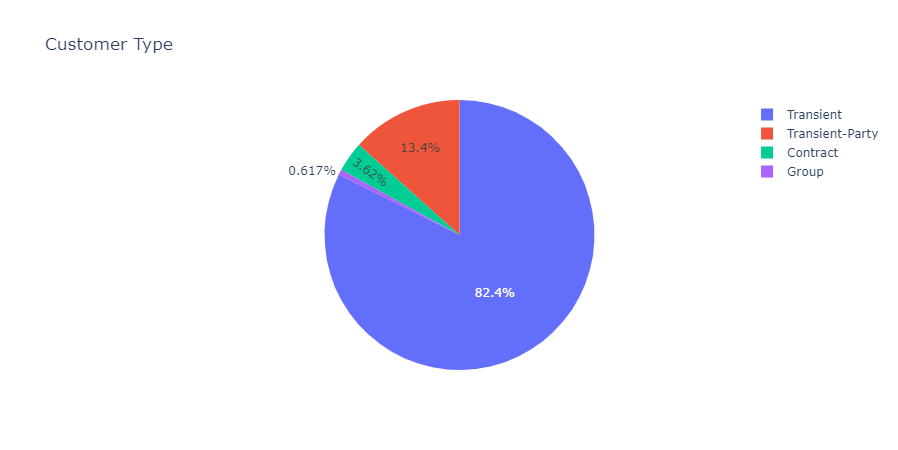

In [ ]:
px.pie(data_frame=df.customer_type.value_counts(),names=df.customer_type.value_counts().index,values=df.customer_type.value_counts(),title='Customer Type')

#### 9. Country

In [ ]:
df_country = df_not_c['country'].value_counts().reset_index()
df_country.columns = ['Country','No.of Guests']
df_country

,Country,No.of Guests
0,PRT,17542
1,GBR,8428
2,FRA,7071
3,ESP,5372
4,DEU,4322
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


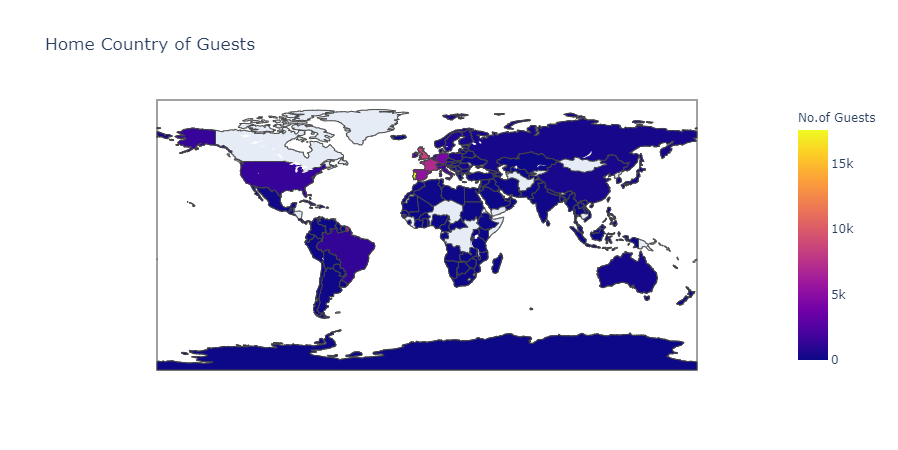

In [ ]:
px.choropleth(df_country,locations=df_country['Country'],color=df_country['No.of Guests'],
              hover_name=df_country['Country'],title='Home Country of Guests')

#### 10. Hotel prices by month

In [ ]:
df_resort = df_not_c[(df_not_c['hotel'] == 'Resort Hotel')]
df_city = df_not_c[(df_not_c['hotel'] == 'City Hotel')]

In [ ]:
resort = df_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city=df_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

combined=resort.merge(city, on = 'arrival_date_month')
combined.columns = ['month', 'resort price', 'city price']
combined

,month,resort price,city price
0,1,48.852694,83.729687
1,2,53.977059,88.324398
2,3,57.512456,91.334430
3,4,77.219541,114.368336
4,5,77.818102,124.837552
5,6,109.200465,120.697766
6,7,151.297719,120.346486
7,8,182.256818,123.023174
8,9,98.744746,116.957015
9,10,62.830638,105.594411


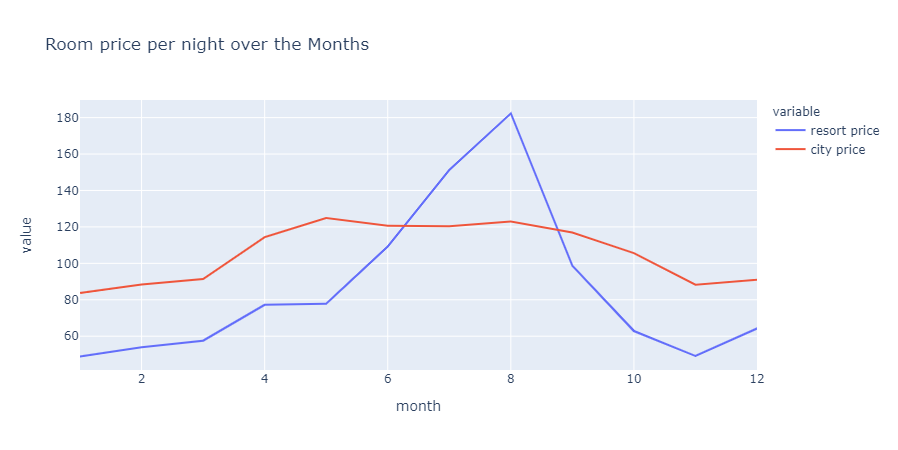

In [ ]:
px.line(combined, x = 'month', y = ['resort price','city price'],
        title = 'Room price per night over the Months')

#### 11. Busy month

In [ ]:
resort_m = df_resort['arrival_date_month'].value_counts().reset_index()
resort_m.columns=['month','no of guests']
resort_m

,month,no of guests
0,8,3133
1,7,2986
2,5,2234
3,10,2163
4,3,2138
5,4,2137
6,2,1999
7,6,1915
8,9,1850
9,11,1706


In [ ]:
city_m = df_city['arrival_date_month'].value_counts().reset_index()
city_m.columns=['month','no of guests']
city_m

,month,no of guests
0,8,4446
1,7,3811
2,5,3648
3,6,3469
4,3,3463
5,4,3312
6,9,3162
7,10,3056
8,2,2606
9,11,2174


In [ ]:
combined_m = resort_m.merge(city_m,on='month')
combined_m.columns=['month','no of guests in resort','no of guest in city hotel']
combined_m

,month,no of guests in resort,no of guest in city hotel
0,8,3133,4446
1,7,2986,3811
2,5,2234,3648
3,10,2163,3056
4,3,2138,3463
5,4,2137,3312
6,2,1999,2606
7,6,1915,3469
8,9,1850,3162
9,11,1706,2174


In [ ]:
combined_m=combined_m.sort_values('month')

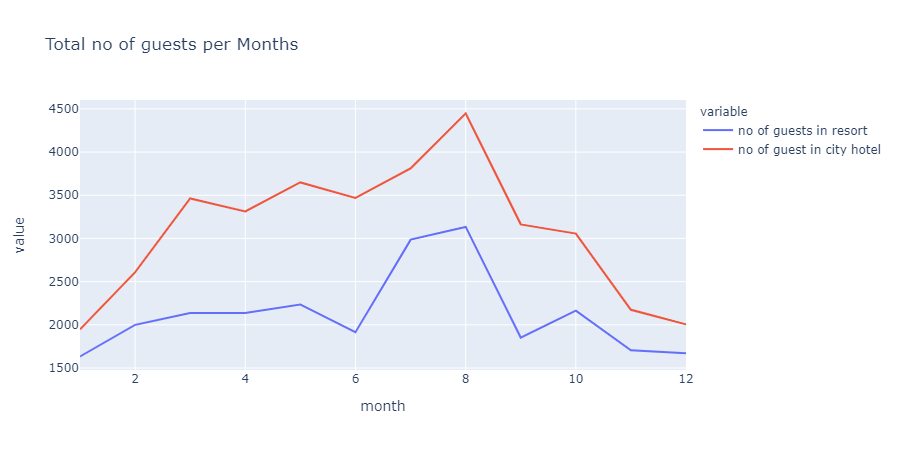

In [ ]:
px.line(combined_m, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months')

# Data Preprocessing <a id="preprocess"></a>

### Drop columns that are not necessary

In [ ]:
label = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']
df.drop(labels=label,axis=1,inplace=True)

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,7,27,1,0,0,2,0,...,0,0,C,No Deposit,0,Transient,0.00,0,0,2015-07-01
1,Resort Hotel,0,737,7,27,1,0,0,2,0,...,0,0,C,No Deposit,0,Transient,0.00,0,0,2015-07-01
2,Resort Hotel,0,7,7,27,1,0,1,1,0,...,0,0,A,No Deposit,0,Transient,75.00,0,0,2015-07-02
3,Resort Hotel,0,13,7,27,1,0,1,1,0,...,0,0,A,No Deposit,304,Transient,75.00,0,0,2015-07-02
4,Resort Hotel,0,14,7,27,1,0,2,2,0,...,0,0,A,No Deposit,240,Transient,98.00,0,1,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,8,35,30,2,5,2,0,...,0,0,A,No Deposit,394,Transient,96.14,0,0,2017-09-06
119386,City Hotel,0,102,8,35,31,2,5,3,0,...,0,0,E,No Deposit,9,Transient,225.43,0,2,2017-09-07
119387,City Hotel,0,34,8,35,31,2,5,2,0,...,0,0,D,No Deposit,9,Transient,157.71,0,4,2017-09-07
119388,City Hotel,0,109,8,35,31,2,5,2,0,...,0,0,A,No Deposit,89,Transient,104.40,0,0,2017-09-07


#### Making  2 dataframes with categorical and numberical data seperately for easy manipulation.

In [ ]:
cat_label=['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [ ]:
cat_df = df[cat_label]
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [ ]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

In [ ]:
cat_df

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017-09-06,2017,9,6
119386,City Hotel,BB,Online TA,TA/TO,E,No Deposit,Transient,2017-09-07,2017,9,7
119387,City Hotel,BB,Online TA,TA/TO,D,No Deposit,Transient,2017-09-07,2017,9,7
119388,City Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2017-09-07,2017,9,7


In [ ]:
cat_df.drop(['reservation_status_date'] , axis = 1, inplace = True)

In [ ]:
cat_df

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3
...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017,9,6
119386,City Hotel,BB,Online TA,TA/TO,E,No Deposit,Transient,2017,9,7
119387,City Hotel,BB,Online TA,TA/TO,D,No Deposit,Transient,2017,9,7
119388,City Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2017,9,7


## Converting Features

In [ ]:
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

In [ ]:
cat_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


In [ ]:
num_df = df.drop(columns = cat_label, axis = 1)
num_df.drop('is_canceled', axis = 1, inplace = True)
num_df

,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
0,342,7,27,1,0,0,2,0,0,0,0,0,0,0.00,0,0
1,737,7,27,1,0,0,2,0,0,0,0,0,0,0.00,0,0
2,7,7,27,1,0,1,1,0,0,0,0,0,0,75.00,0,0
3,13,7,27,1,0,1,1,0,0,0,0,0,304,75.00,0,0
4,14,7,27,1,0,2,2,0,0,0,0,0,240,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,8,35,30,2,5,2,0,0,0,0,0,394,96.14,0,0
119386,102,8,35,31,2,5,3,0,0,0,0,0,9,225.43,0,2
119387,34,8,35,31,2,5,2,0,0,0,0,0,9,157.71,0,4
119388,109,8,35,31,2,5,2,0,0,0,0,0,89,104.40,0,0


In [ ]:
num_df.var()

lead_time                          7405.514793
arrival_date_month                    9.555541
arrival_date_week_number            186.220567
arrival_date_day_of_month            78.056524
stays_in_weekend_nights               1.049666
stays_in_week_nights                  4.125836
adults                                0.377861
children                              0.200278
babies                                0.012925
is_repeated_guest                     0.037300
previous_cancellations                0.137048
previous_bookings_not_canceled        2.962229
agent                             12111.852271
adr                                3009.694782
required_car_parking_spaces           0.078853
total_of_special_requests             0.691541
dtype: float64

Variance is very high in some columns, so let's normalize (or say rescale) them.

In [ ]:
num_df['lead_time'] = np.log(num_df['lead_time'] + 1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] + 1)
num_df['adr'] = np.log(num_df['adr'] + 1)

In [ ]:
num_df.var()

lead_time                         2.631912
arrival_date_month                9.555541
arrival_date_week_number          0.455235
arrival_date_day_of_month         0.513531
stays_in_weekend_nights           1.049666
stays_in_week_nights              4.125836
adults                            0.377861
children                          0.200278
babies                            0.012925
is_repeated_guest                 0.037300
previous_cancellations            0.137048
previous_bookings_not_canceled    2.962229
agent                             3.471362
adr                               0.614435
required_car_parking_spaces       0.078853
total_of_special_requests         0.691541
dtype: float64

In [ ]:
num_df['adr'] = num_df['adr'].fillna(value = num_df['adr'].mean())

# Building Machine Learning Models <a id="model"></a>

In [ ]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['is_canceled']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Splitting data into training set and test set

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.30,random_state=50)

## Logistic Regression

In [ ]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Decision Tree is : {acc_lr}")

Accuracy Score of Decision Tree is : 0.7993299445471349


<AxesSubplot:>

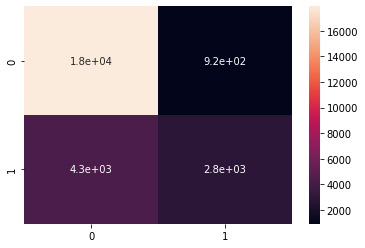

In [ ]:
sns.heatmap(conf,annot=True)

In [ ]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     18830
           1       0.76      0.40      0.52      7138

    accuracy                           0.80     25968
   macro avg       0.78      0.67      0.70     25968
weighted avg       0.79      0.80      0.78     25968



## Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")

Accuracy Score of Decision Tree is : 0.9340727048675292


<AxesSubplot:>

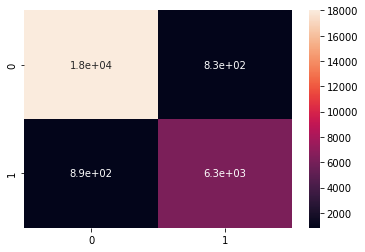

In [ ]:
sns.heatmap(conf,annot=True)

In [ ]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     18830
           1       0.88      0.88      0.88      7138

    accuracy                           0.93     25968
   macro avg       0.92      0.92      0.92     25968
weighted avg       0.93      0.93      0.93     25968



## Random Forest Classifier

In [ ]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")

Accuracy Score of Random Forest is : 0.9404266789895256


<AxesSubplot:>

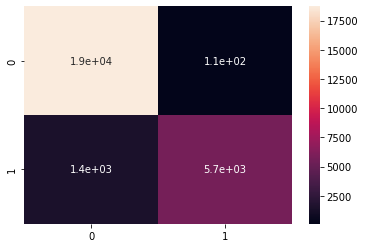

In [ ]:
sns.heatmap(conf,annot=True)

In [ ]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     18830
           1       0.98      0.80      0.88      7138

    accuracy                           0.94     25968
   macro avg       0.96      0.90      0.92     25968
weighted avg       0.94      0.94      0.94     25968



In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [acc_lr,acc_dtc, acc_rd_clf]
})


models.sort_values(by ='Score', ascending = False)

,Model,Score
2,Random Forest Classifier,0.940427
1,Decision Tree Classifier,0.934073
0,Logistic Regression,0.799330


Random Forest Classifier has accuracy of 94%, with weighted precision and recall of 94% which is great.